In [1]:
import load_data as ld
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
% matplotlib inline

In [2]:
df = ld.load_data()

C:\Users\kevin.rose\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\IPython\core\interactiveshell.py:2881: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Article Tags Exploration

In [3]:
print('Number relevant articles:', df['relevant'].sum())
print('Number tagged articles  :', df.loc[:, 'OEMC':'TASR'].any(1).sum())

Number relevant articles: 112091
Number tagged articles  : 36986


In [4]:
categories_df = ld.load_categories()
categories_df = categories_df.loc[:, ['abbreviation', 'category_name']]
categories_df.set_index('abbreviation', drop=True, inplace=True)

categories_df['counts'] = df.loc[:, 'OEMC':'TASR'].apply(sum, reduce=True)
categories_df.sort_values(by='counts')

,category_name,counts
abbreviation,,
ENVI,Environmental Crimes,49
TASR,Police Use of Taser,119
OEMC,Office of Emergency Management & Communications,127
REEN,Re-Entry,129
CPBD,Chicago Police Board,155
ILSC,Illinois State Court,179
IMMG,Immigration,218
CPUB,Cook County Public Defender's Office,222
IDOC,Illinois Department of Corrections,300


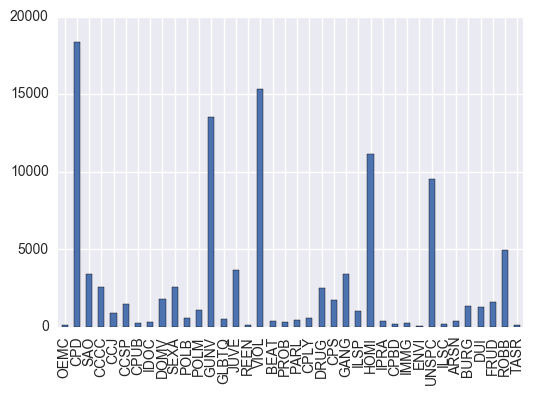

In [5]:
df.loc[:, 'OEMC':'TASR'].apply(sum, reduce=True).plot(kind='bar');

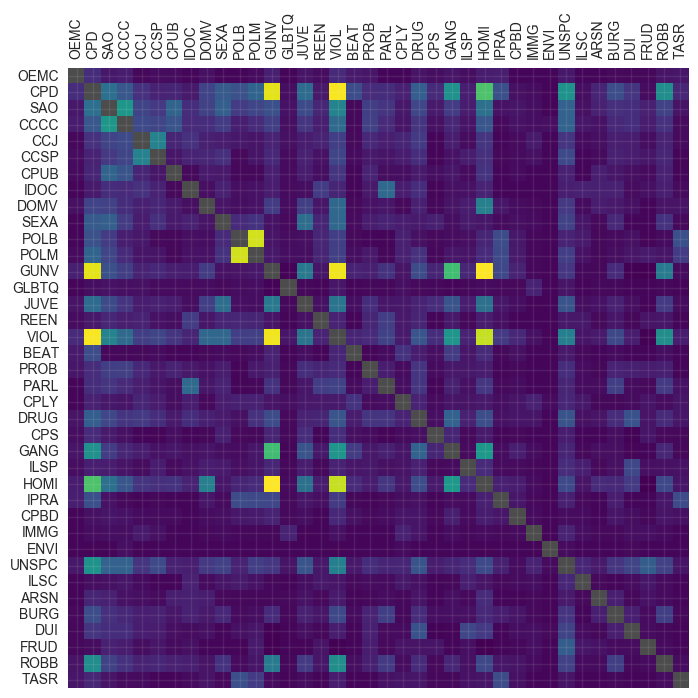

In [6]:
corrs = df.loc[:, 'OEMC':'TASR'].corr()
for i in range(corrs.shape[0]):
    corrs.iloc[i, i] = np.nan

cmap = matplotlib.cm.viridis
cmap.set_bad((.3, .3, .3),1.)

fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(np.ma.masked_invalid(corrs.values), cmap=cmap)

ax.grid(True, color=(.9, .9, .9), alpha=.1)

plt.xticks(range(len(corrs.columns)), corrs.columns, rotation=90);
plt.yticks(range(len(corrs.columns)), corrs.columns);

# Text Contents Exploration

In [7]:
# Print a random article just to see what they look like.
i = np.random.choice(df.shape[0])
print('ARTICLE ID:', df.index[i], '\n------------------')
print(df.iloc[i]['bodytext'])

ARTICLE ID: 208912 
------------------
**(CBS)** -- Thousands of Cuban Americans are still very angry with the Castro g
overnment. They fled in the 1960's and are vowing not to return, even if U.S. re
lations with Cuba are fully restored. WBBM's Felicia Middlebrooks has the final 
report in her series "Turning Point: Cuba in Transition."

#### WBBM 780’s Felicia Middlebrooks

![cuba 1455 Turning Point Part 5: Cuban Americans Still Angry With Castros][1]

![wbbm icon Turning Point Part 5: Cuban Americans Still Angry With Castros][2]

WBBM 780/105.9FM

[play][3][pause][4]

![][5]

   [1]: https://cbschicago.files.wordpress.com/2012/06/cuba-1455.jpg?w=420 (Turn
ing Point Part 5: Cuban Americans Still Angry With Castros)
   [2]: http://cbschicago.files.wordpress.com/2014/04/wbbm-icon.jpg?w=420 ( WBBM
 780/105.9FM)
   [3]: https://cbschicago.files.wordpress.com/2015/06/mp3_bc-wav-production-tur
ning-point-wr-5-part-5.mp3
   [4]: 
   [5]: http://pixel.wp.com/b.gif?host=chicago.cbslocal.com&b

## Some questions:

* How to handle articles that talk about more than one crime (i.e. a summary of weekend violence)?
* Would we want the scraper to keep any more information going forward? Author name, for example?
* Do we want to have manually-defined cleaning built around the format? I.e. specifically remove the links at the bottom that are result of RSS format? 

In [8]:
import nltk
# you may need to run nltk.download()
# and get the "punkt" dataset under the "Models" tab
# to use the word_tokenize function. Other models might
# be necessary as well.

In [9]:
def all_words():
    counter = 0
    for txt in df['bodytext']:
        tokens = nltk.tokenize.word_tokenize(txt)
        for t in tokens:
            if t[0] not in '[](){},.\'"`*:;/\\-+=_':
                yield t.lower()
                counter += 1
            if counter > 5e6: # at some point will need to run fully, but truncate for now
                return

In [10]:
word_freqs = nltk.FreqDist(all_words())

"the": 231437
"to": 116701
"a": 112429
"and": 108191
"of": 97070
"in": 87230
"that": 44196
"for": 41221
"was": 40798
"said": 39098
"on": 35101
"he": 33583
"is": 30756
"with": 28984
"http": 27320
"at": 27077
"it": 25655
"his": 23825
"1": 23028
"2": 22471
"as": 20701
"by": 20654
"i": 20545
"3": 19684
"be": 18580
"from": 18571
"#": 18509
"4": 18202
"this": 18195
"not": 17076
"5": 16959
"have": 16805
"but": 16358
"an": 15952
"chicago": 15871
"police": 15635
"6": 15384
"they": 15253
"who": 15136
"are": 15050


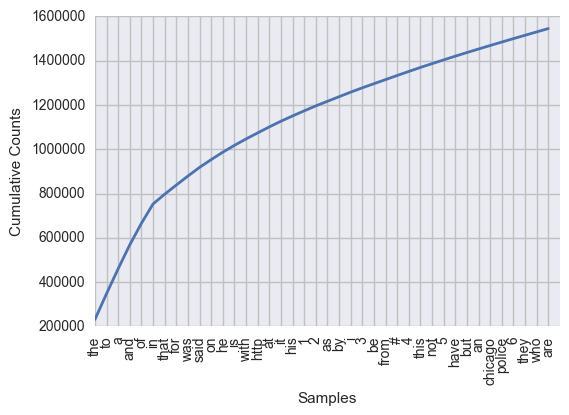

In [11]:
for pair in word_freqs.most_common(40):
    print('"{}": {}'.format(pair[0], pair[1]))
word_freqs.plot(40, cumulative=True)

In [12]:
print('The word "the" is {0:.4} times more common than "gun".'.format(
    word_freqs.freq('the') / word_freqs.freq('gun')
))

The word "the" is 173.5 times more common than "gun".


In [13]:
print('Confusion matrix using existence of "gun" to predict "GUNV" tag:')
pd.crosstab(df['bodytext'].str.contains('gun'), df['GUNV'])

Confusion matrix using existence of "gun" to predict "GUNV" tag:


GUNV,0,1
bodytext,,
False,238193,4347
True,20121,9147


# Model Exploration

Create a simple logistic classifier from a bag-of-words feature set.

In [14]:
import sklearn

In [15]:
crime_df = df.ix[df['relevant'], :]
print(crime_df.shape)
crime_df = crime_df.ix[crime_df.loc[:, 'OEMC':'TASR'].any(1), :]
print(crime_df.shape)

idx = np.random.permutation(crime_df.shape[0])
trn = crime_df.iloc[idx[:int(crime_df.shape[0] * 0.7)], :]
tst = crime_df.iloc[idx[int(crime_df.shape[0] * 0.7):], :]
print(trn.shape)
print(tst.shape)

(112091, 45)
(34253, 45)
(23977, 45)
(10276, 45)


In [16]:
vectorizer = sklearn.feature_extraction.text.CountVectorizer(min_df=1)
X = vectorizer.fit_transform(trn['bodytext'].values)
Y = trn.loc[:, 'OEMC':'TASR'].values

In [17]:
X.shape

(23977, 120013)

In [18]:
clf = sklearn.multiclass.OneVsRestClassifier(
    sklearn.linear_model.LogisticRegression()
)
clf.fit(X, Y)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [19]:
X_tst = vectorizer.transform(tst['bodytext'].values)
Y_tst = tst.loc[:, 'OEMC':'TASR'].values

Y_hat = clf.predict_proba(X_tst)

In [20]:
perf = pd.DataFrame()

for i in range(Y_hat.shape[1]):
    tag = tst.columns[7+i]
    perf.loc['TP', tag] = sum((Y_hat[:,i] > .5) & (Y_tst[:,i] == 1))
    perf.loc['FP', tag] = sum((Y_hat[:,i] > .5) & (Y_tst[:,i] == 0))
    perf.loc['TN', tag] = sum((Y_hat[:,i] < .5) & (Y_tst[:,i] == 0))
    perf.loc['FN', tag] = sum((Y_hat[:,i] < .5) & (Y_tst[:,i] == 1))
    perf.loc['TPR', tag] = perf.loc['TP', tag] / (perf.loc['TP', tag] + perf.loc['FN', tag])
    perf.loc['FPR', tag] = perf.loc['FP', tag] / (perf.loc['FP', tag] + perf.loc['TN', tag])
    perf.loc['PPV', tag] = perf.loc['TP', tag] / (perf.loc['TP', tag] + perf.loc['FP', tag])

perf = perf.T
perf

,TP,FP,TN,FN,TPR,FPR,PPV
OEMC,7.0,5.0,10234.0,30.0,0.189189,0.000488,0.583333
CPD,4377.0,1079.0,3860.0,960.0,0.820124,0.218465,0.802236
SAO,597.0,266.0,9029.0,384.0,0.608563,0.028618,0.691773
CCCC,361.0,264.0,9292.0,359.0,0.501389,0.027627,0.577600
CCJ,133.0,58.0,9950.0,135.0,0.496269,0.005795,0.696335
CCSP,226.0,86.0,9802.0,162.0,0.582474,0.008697,0.724359
CPUB,22.0,17.0,10206.0,31.0,0.415094,0.001663,0.564103
IDOC,28.0,17.0,10175.0,56.0,0.333333,0.001668,0.622222
DOMV,324.0,113.0,9657.0,182.0,0.640316,0.011566,0.741419
SEXA,614.0,69.0,9471.0,122.0,0.834239,0.007233,0.898975


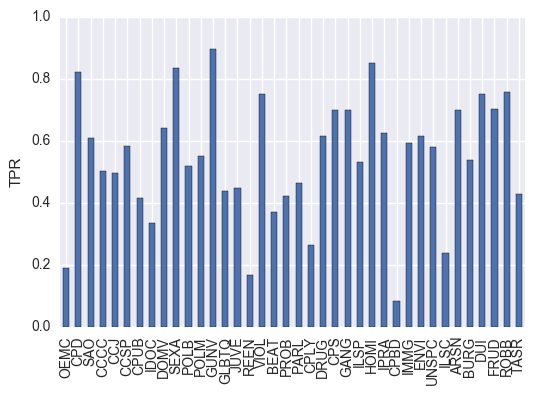

In [21]:
perf['TPR'].plot(kind='bar', ylim=[0,1])
plt.ylabel('TPR');

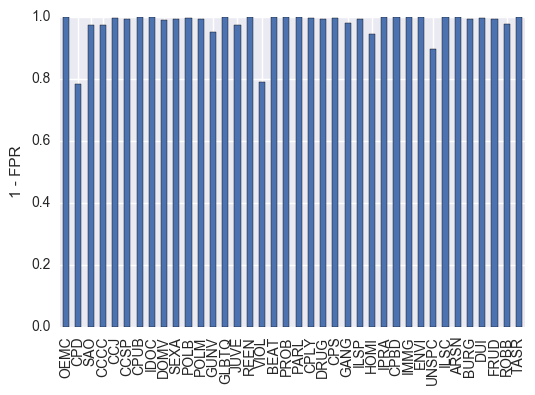

In [22]:
(1 - perf['FPR']).plot(kind='bar', ylim=[0,1])
plt.ylabel('1 - FPR');

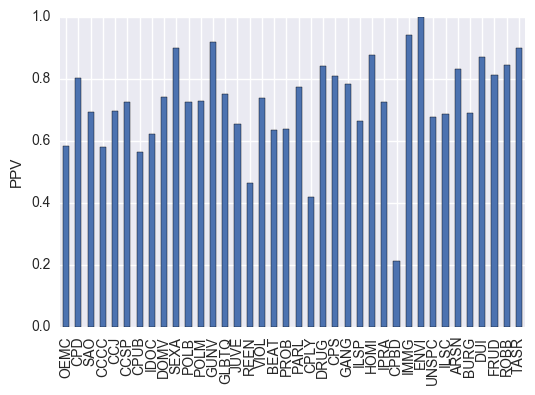

In [23]:
perf['PPV'].plot(kind='bar', ylim=[0,1])
plt.ylabel('PPV');